<a href="https://colab.research.google.com/github/AnoVando/MSIS/blob/master/MSIS549_HW3_RNN_Reuters_JMatthews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSIS 579 HW3 RNN to Classify Reuters Topics

In this homework, we will train a recurrent neural network to Classify Reuters newswires into 46 Topics.

Dataset of 11,228 newswires from Reuters, labeled over 46 topics. As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

In [0]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from __future__ import print_function

import numpy as np
import keras
keras.__version__

!pip install numpy==1.16.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


## Load Reuters Dataset

First let's load the Reuters dataset. Please refer to [this API page](https://keras.io/datasets/#reuters-newswire-topics-classification) for details on how to load the data.

In [0]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import preprocessing
from keras.preprocessing.text import Tokenizer

max_words = 10000
# (among top max_features most common words)
maxlen = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Loading data...
557056/550378 [==============================] - 0s 0us/step


In [0]:
from keras.utils import np_utils # one hot encode the y-label
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

## Task 1: Fully Connected Neural Networks

In this task, we will learn a word embedding layer as well as fully connected layers to classify Reuters newwires. Please refer to the lab code from lesson 4. Watch out the overfitting. 

In [0]:
# TODO
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from keras import layers

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`


# We add the classifier on top

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                256064    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 46)               

In [0]:
history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 2s 288us/step - loss: 2.0241 - accuracy: 0.4683 - val_loss: 1.7500 - val_accuracy: 0.5398
Epoch 2/10
7185/7185 [==============================] - 2s 243us/step - loss: 1.5387 - accuracy: 0.5905 - val_loss: 1.5149 - val_accuracy: 0.6144
Epoch 3/10
7185/7185 [==============================] - 2s 241us/step - loss: 1.2526 - accuracy: 0.6642 - val_loss: 1.5062 - val_accuracy: 0.6283
Epoch 4/10
7185/7185 [==============================] - 2s 245us/step - loss: 1.0178 - accuracy: 0.7307 - val_loss: 1.7169 - val_accuracy: 0.6405
Epoch 5/10
7185/7185 [==============================] - 2s 248us/step - loss: 0.8500 - accuracy: 0.7779 - val_loss: 1.9832 - val_accuracy: 0.6450
Epoch 6/10
7185/7185 [==============================] - 2s 242us/step - loss: 0.7139 - accuracy: 0.8090 - val_loss: 2.2752 - val_accuracy: 0.6411
Epoch 7/10
7185/7185 [==============================] - 2s 246us/step - loss

10 epoch ends up with overfitting. Reducing the epochs to 3 epochs.


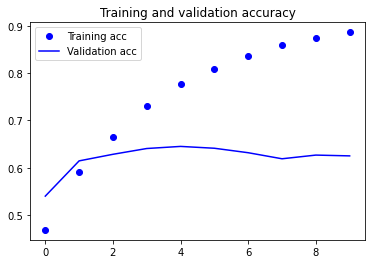

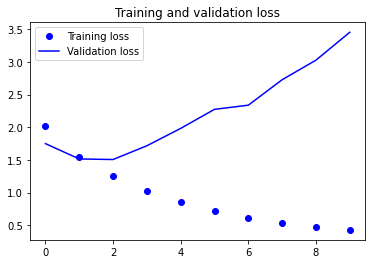

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [0]:
#using 3 epochs
history = model.fit(
    x_train, 
    y_train,
    epochs=3,
    batch_size=32,
    validation_split=0.2
)

Train on 7185 samples, validate on 1797 samples
Epoch 1/3
7185/7185 [==============================] - 2s 312us/step - loss: 2.0273 - accuracy: 0.4518 - val_loss: 1.7094 - val_accuracy: 0.5409
Epoch 2/3
7185/7185 [==============================] - 2s 273us/step - loss: 1.5461 - accuracy: 0.5981 - val_loss: 1.5026 - val_accuracy: 0.6155
Epoch 3/3
7185/7185 [==============================] - 2s 268us/step - loss: 1.2488 - accuracy: 0.6697 - val_loss: 1.4890 - val_accuracy: 0.6294


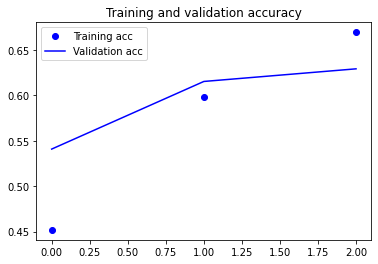

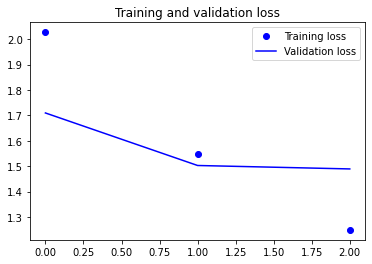

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [0]:
test_eval = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 55us/step


In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.525930942325643
Test accuracy: 0.6193232536315918


## Task 2: RNN/LSTM
Now, we have a fully connected neural networks trained for prediction topics in Reuters data. In this task, we will swap out the fully connect layers and replace with a more powerful RNN layers (LSTM, GRU). Try experiment with different RNN layers and see if they can help improve the model performance.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 44s 6ms/step - loss: 2.7202 - accuracy: 0.3459 - val_loss: 2.2848 - val_accuracy: 0.4558
Epoch 2/10
7185/7185 [==============================] - 44s 6ms/step - loss: 2.1156 - accuracy: 0.4754 - val_loss: 1.9992 - val_accuracy: 0.4891
Epoch 3/10
7185/7185 [==============================] - 44s 6ms/step - loss: 1.8663 - accuracy: 0.5204 - val_loss: 2.1358 - val_accuracy: 0.5164
Epoch 4/10
7185/7185 [==============================] - 44s 6ms/step - loss: 1.7261 - accuracy: 0.5428 - val_loss: 1.7964 - val_accuracy: 0.5220
Epoch 5/10
7185/7185 [==============================] - 44s 6ms/step - loss: 1.6267 - accuracy: 0.5687 - val_loss: 1.7219 - val_accuracy: 0.5509
Epoch 6/10
7185/7185 [==============================] - 44s 6ms/step - loss: 1.5180 - accuracy: 0.6006 - val_loss: 1.7006 - val_accuracy: 0.5693
Epoch 7/10
7185/7185 [==============================] - 44s 6ms/step - loss: 1.431

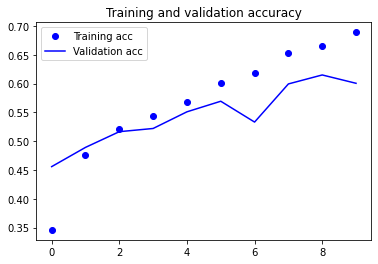

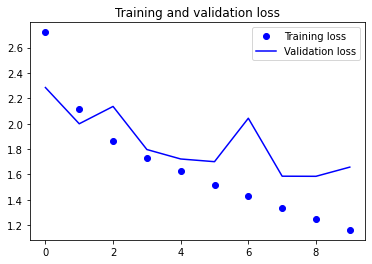

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_eval = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 7s 3ms/step


In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.7069324096822356
Test accuracy: 0.6001781225204468


## Task 3: Use a Pre-trained Word Embedding

In this task, instead of learning the word embedding layer from scratch, we apply a pre-trained word embedding layer and only use the classification base for reuters data. Please refer to the [API](https://keras.io/examples/pretrained_word_embeddings/) for different pre-trained word embedding.

Does the pre-trained word embedding help improve the model prediction?


In [0]:
import os
import shutil
import zipfile
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

!wget --no-check-certificate \
    "http://nlp.stanford.edu/data/glove.6B.zip" \
    -O "/tmp/glove.6B.zip"

local_zip = '/tmp/glove.6B.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.infolist()

--2020-05-09 06:57:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-05-09 06:57:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-05-09 06:57:13--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

[<ZipInfo filename='glove.6B.50d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=171350079 compress_size=69182485>,
 <ZipInfo filename='glove.6B.100d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=347116733 compress_size=134300389>,
 <ZipInfo filename='glove.6B.200d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=693432828 compress_size=264336891>,
 <ZipInfo filename='glove.6B.300d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=1037962819 compress_size=394362180>]

In [0]:
# TODO
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

EMBEDDING_DIM = 100


In [0]:
print('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join('/tmp/glove.6B.100d.txt')) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [0]:
print('Preparing embedding matrix.')

# prepare embedding matrix

num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

#load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

Preparing embedding matrix.


In [0]:

print('Training model.')

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(maxlen,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x=(Dropout(0.5))(embedded_sequences)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(46, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

Training model.
Train on 7185 samples, validate on 1797 samples
Epoch 1/15
7185/7185 [==============================] - 32s 4ms/step - loss: 2.3592 - acc: 0.3868 - val_loss: 2.3146 - val_acc: 0.4157
Epoch 2/15
7185/7185 [==============================] - 32s 4ms/step - loss: 2.0267 - acc: 0.4604 - val_loss: 1.9635 - val_acc: 0.4719
Epoch 3/15
7185/7185 [==============================] - 31s 4ms/step - loss: 1.9482 - acc: 0.4757 - val_loss: 1.8896 - val_acc: 0.5064
Epoch 4/15
7185/7185 [==============================] - 32s 4ms/step - loss: 1.8706 - acc: 0.4998 - val_loss: 1.8085 - val_acc: 0.5136
Epoch 5/15
7185/7185 [==============================] - 32s 4ms/step - loss: 1.8161 - acc: 0.5197 - val_loss: 1.7855 - val_acc: 0.5403
Epoch 6/15
7185/7185 [==============================] - 32s 4ms/step - loss: 1.7719 - acc: 0.5370 - val_loss: 1.8715 - val_acc: 0.5170
Epoch 7/15
7185/7185 [==============================] - 32s 4ms/step - loss: 1.7230 - acc: 0.5474 - val_loss: 1.7557 - val_acc

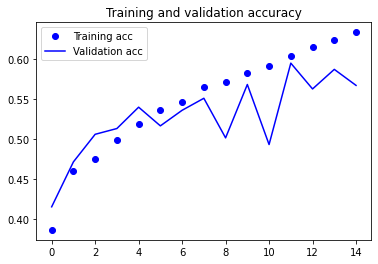

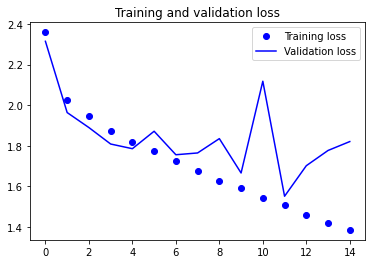

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_eval = model.evaluate(x_test, y_test, verbose=0)

In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.8551949461124246
Test accuracy: 0.551202118396759


The Pre trained model did not exactly improve the model prediction with a test accuracy of 55%. Increasing the epoch increased the chances of overfitting. One reason may be that the size of the training data is less.
